In [1]:
import math
import numpy as np
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn import svm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the file into a pandas data frame
df = pd.read_csv('adult.csv',na_values='?')
print(df.shape)

(32561, 15)


In [3]:
# Drop rows that have missing values
df1 = df.dropna()
print(df1.shape)

(30162, 15)


In [4]:
# Display the first six rows of the data frame after cleaning
df1.head(6)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K


# Unsupervised Analysis

In [27]:
num_samples = df1.shape[0]
num_attributes = df1.shape[1]
print(num_samples, num_attributes)

y = np.array(df1['income'])
print(y)

# Used from: https://www.w3resource.com/python-exercises/numpy/python-numpy-exercise-94.php
unique_elements, counts_elements = np.unique(y, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

30162 15
['<=50K' '<=50K' '<=50K' ... '>50K' '<=50K' '<=50K']
Frequency of unique values of the said array:
[['<=50K' '>50K']
 [22654 7508]]


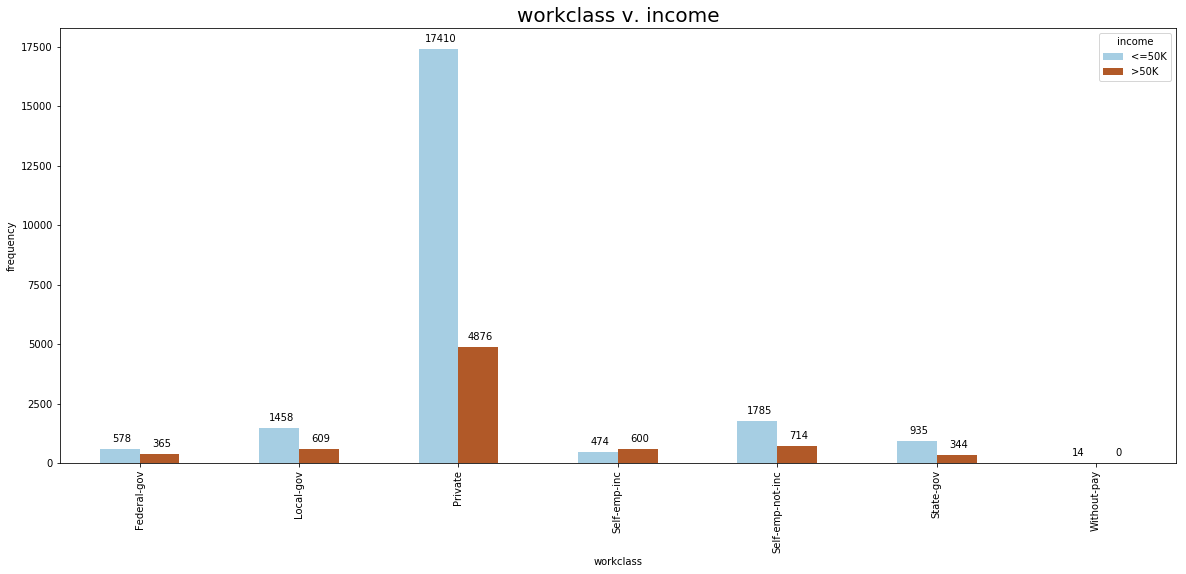

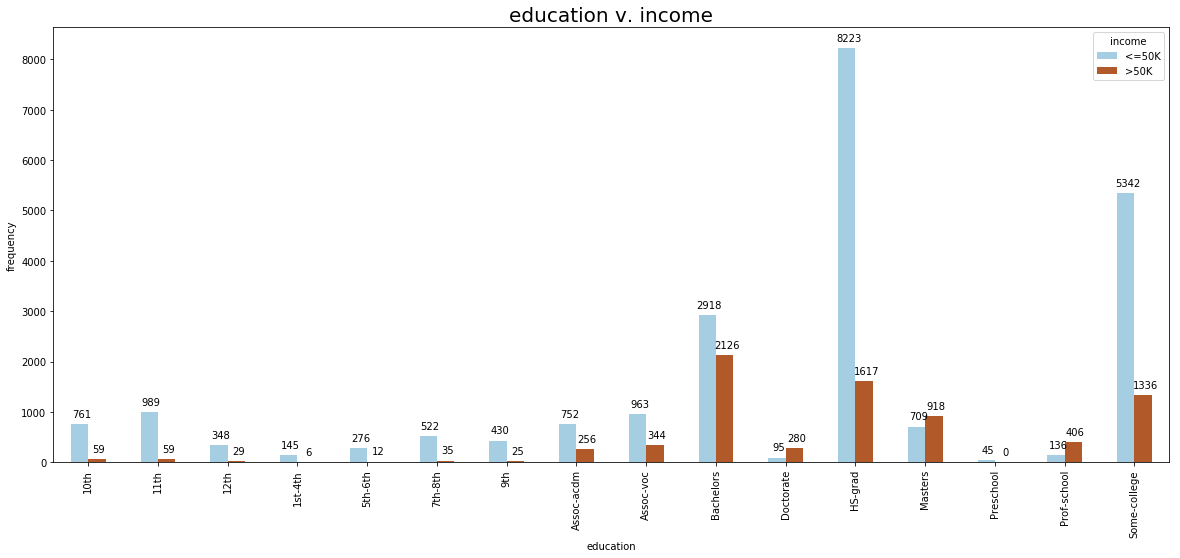

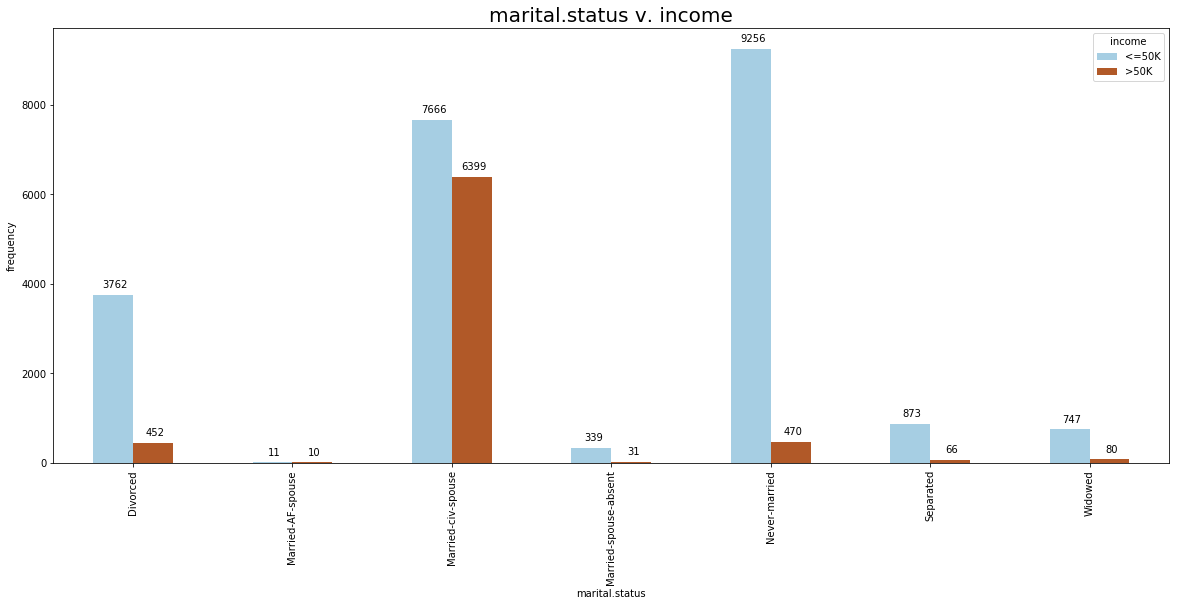

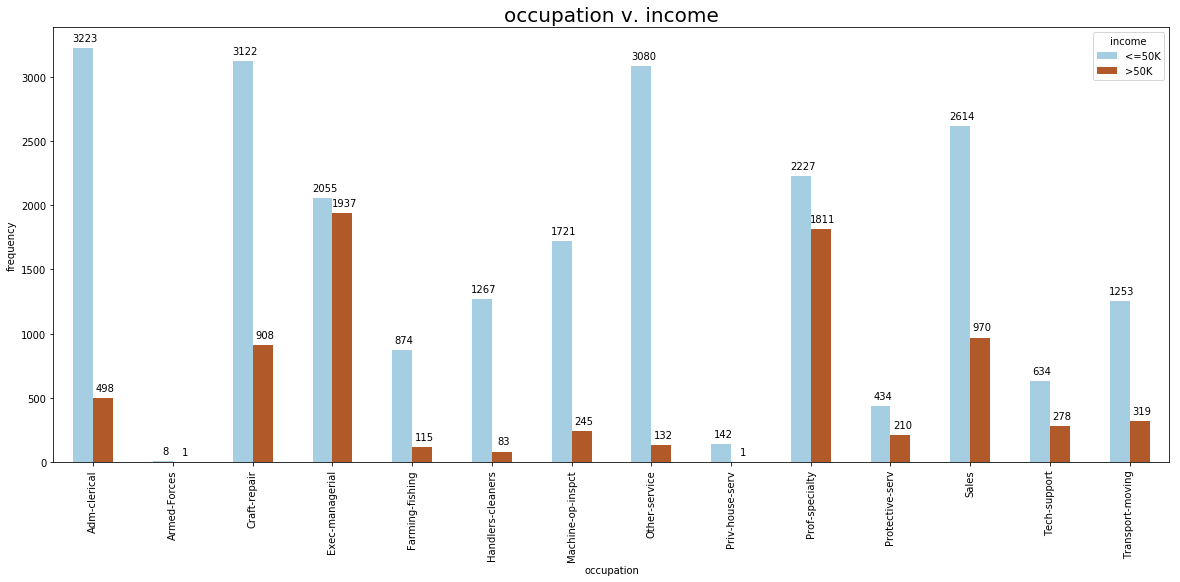

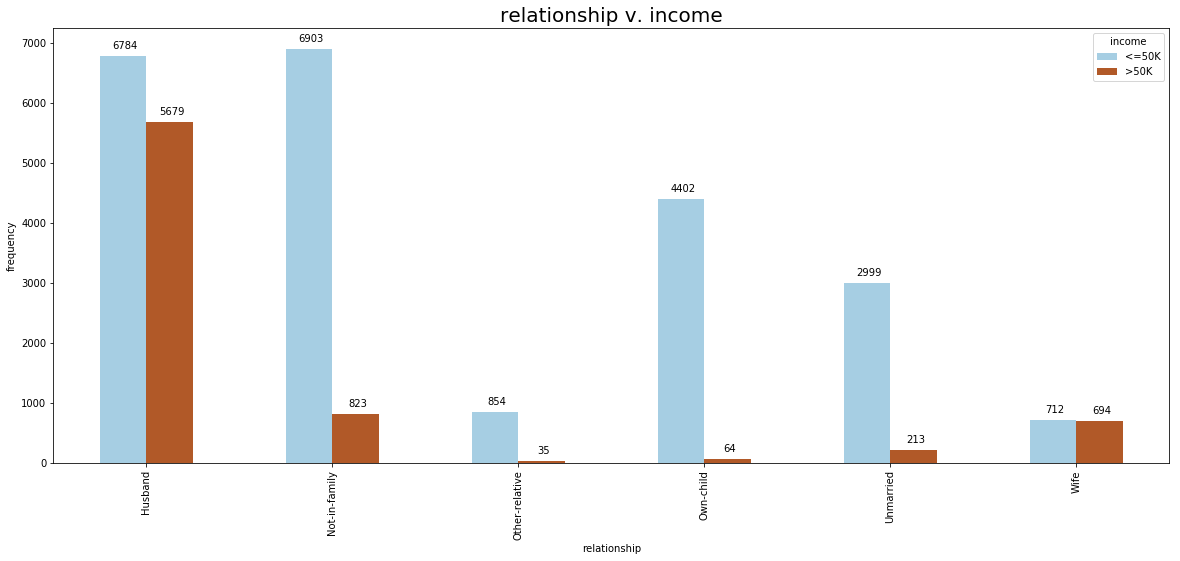

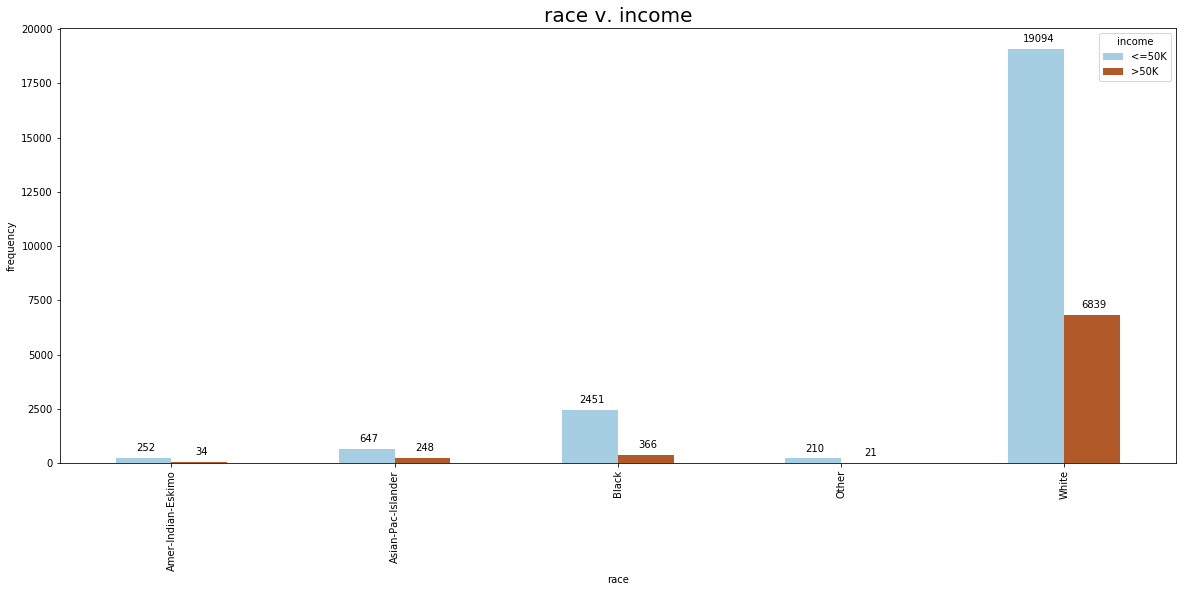

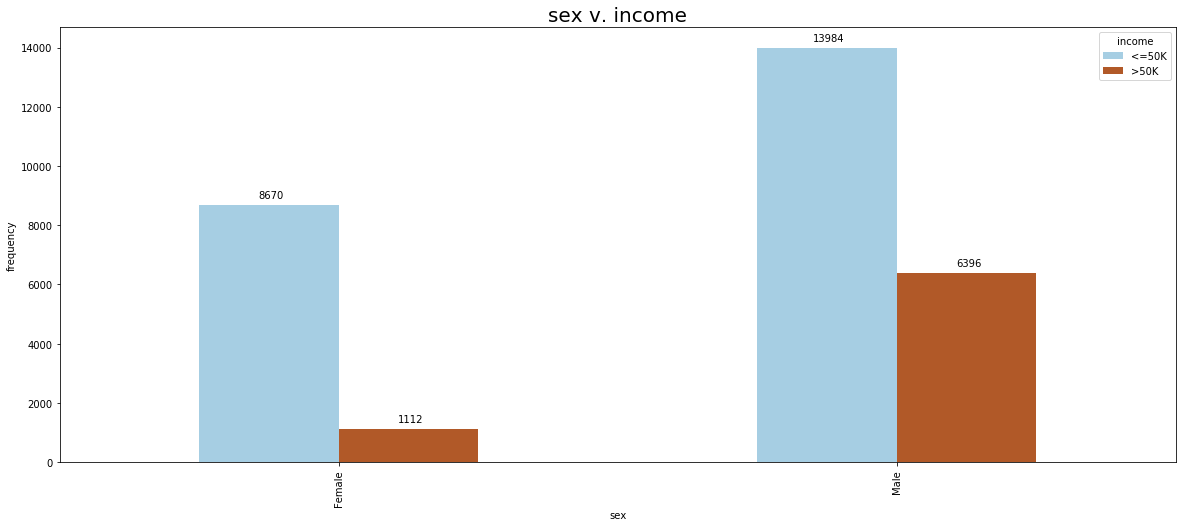

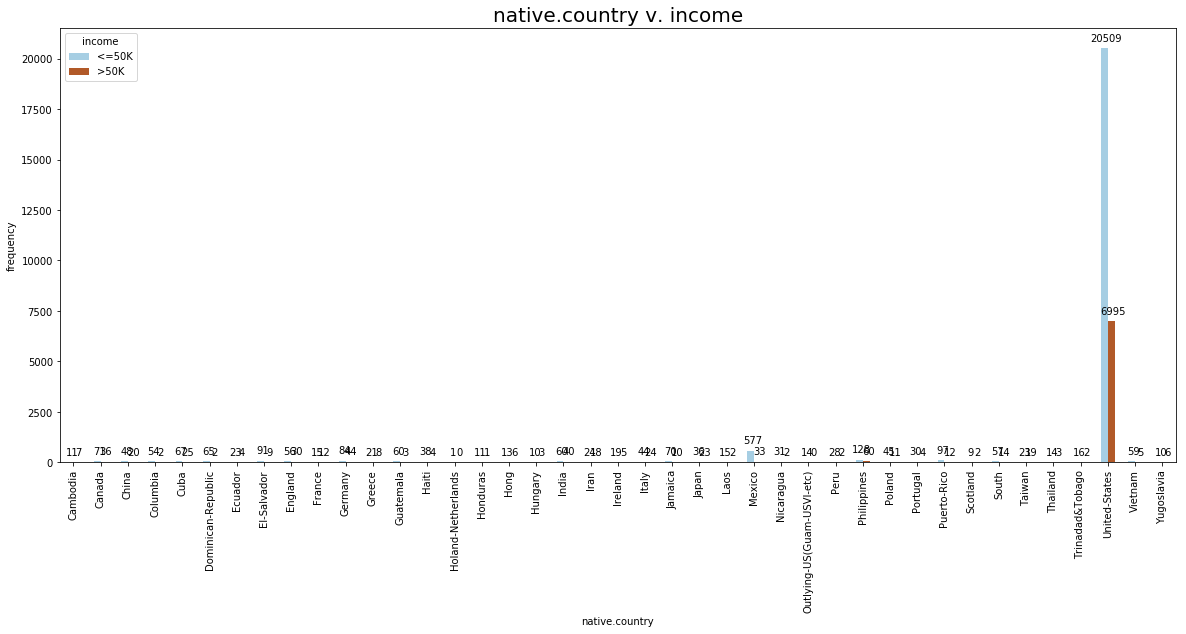

In [123]:
# Create visual plots for qualitative features
qual_features = ['workclass','education','marital.status',
         'occupation','relationship','race','sex','native.country']

for i in qual_features:
    counts = df1.groupby([i, 'income'])[i].count().unstack()
    ax = counts.plot(kind='bar',stacked=False, colormap='Paired',figsize=(8,8))

    for p in ax.patches:
            ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(2, 10), textcoords='offset points')

    # Manually set age group labels
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(i+' v. income',fontsize=20)
    plt.show()

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


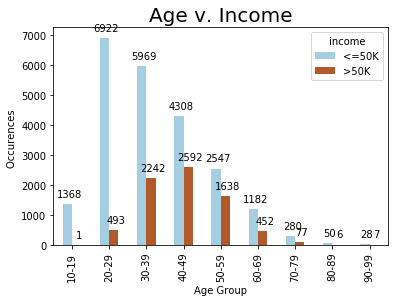

In [115]:
# Age visual plot
# Referred to: https://stackoverflow.com/questions/41143707/stacked-plot-to-represent-genders-for-an-age-group-from-csv-containing-identifie
bins = np.arange(9, 100, 10)
bins_labels = []
for i in range(1,len(bins)):
    bins_labels.append(str(bins[i]-9)+'-'+str(bins[i]))

df1['category'] = np.digitize(df1['age'], bins, right=True)
counts = df1.groupby(['category', 'income'])['age'].count().unstack()
ax = counts.plot(kind='bar',stacked=False, colormap='Paired')

for p in ax.patches:
        ax.annotate(np.round(p.get_height(),decimals=0).astype(np.int64), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(2, 10), textcoords='offset points')

# Manually set age group labels
ax.set_xticklabels(bins_labels)
plt.xlabel('Age Group')
plt.ylabel('Occurences ')
plt.title('Age v. Income',fontsize=20)
plt.show()

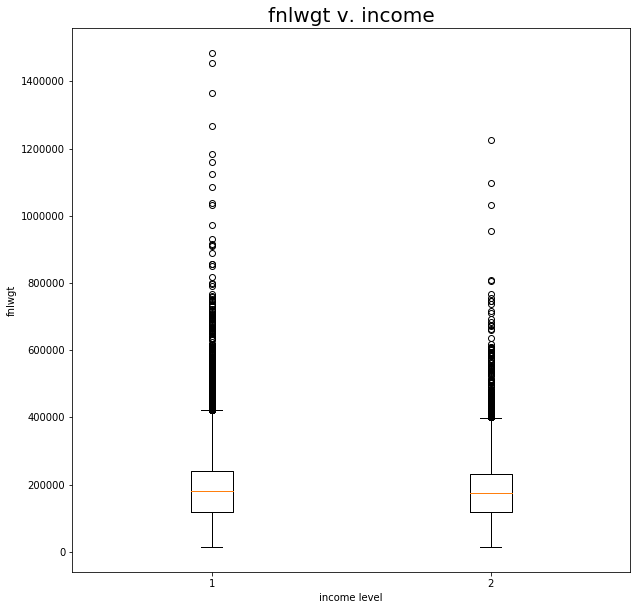

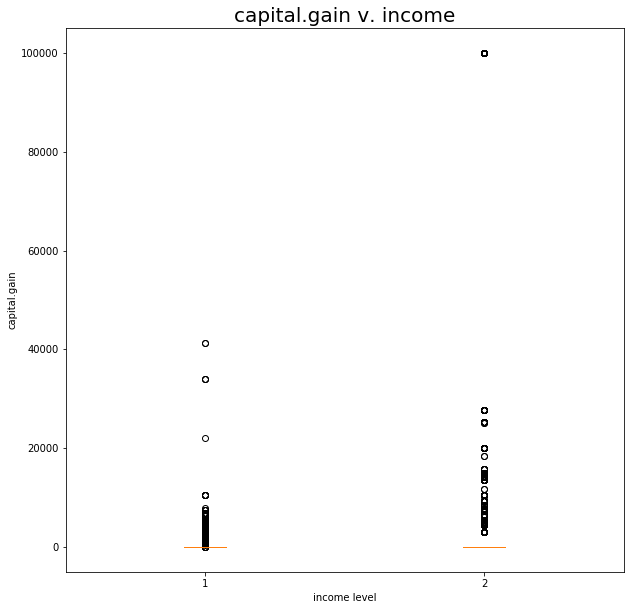

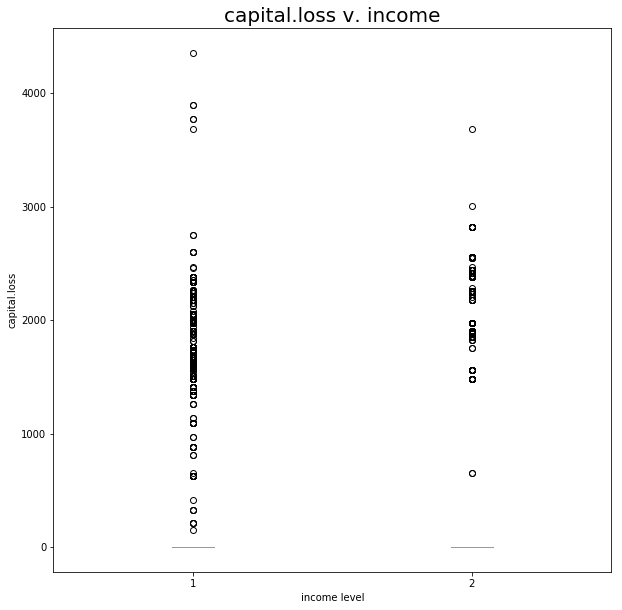

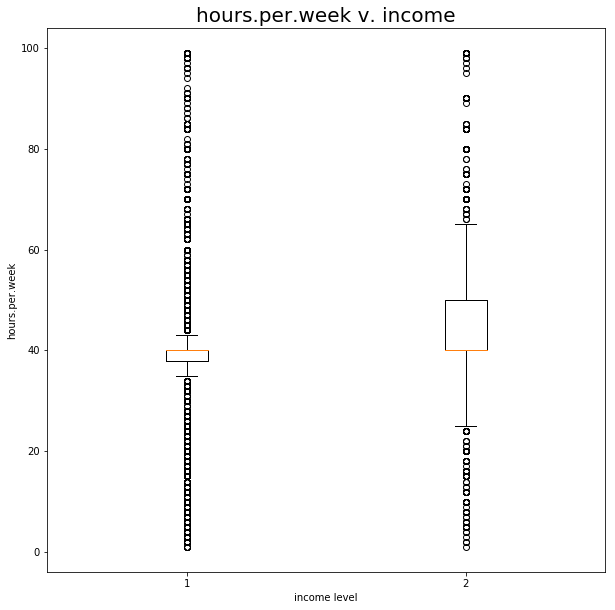

In [99]:
# Create visual plots for rest of the quantitative features
# Referred to: https://riptutorial.com/matplotlib/example/21222/basic-boxplots
quant_features = ['fnlwgt','capital.gain','capital.loss','hours.per.week']

for i in quant_features:
    fnlwgt_below50 = np.array(df1[i].loc[df1['income'] == '<=50K'])
    fnlwgt_above50 = np.array(df1[i].loc[df1['income'] == '>50K'])
    counts = [ fnlwgt_below50, fnlwgt_above50 ]
    plt.gcf().set_size_inches(10, 10, forward=True)
    plt.boxplot(counts)
    plt.xlabel('income level')
    plt.ylabel(i)
    plt.title(i+' v. income',fontsize=20)
    plt.show()
